In [2]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
batch_size = 64
num_classes = 10
epochs = 50

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#splitting the dataset into training and testing data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalisation
x_train /= 255
x_test /= 255

In [5]:
print(x_train.shape[0], 'training data')
print(x_test.shape[0], 'test data')

60000 training data
10000 test data


In [6]:
#binaary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
#The model used here is the sequential model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(784, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [8]:
model.summary()
#sgd = keras.optimizers.SGD(lr=0.01, momentum=0.1, decay=0.0, nesterov=False)
sgd = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               402192    
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 811,962
Trainable params: 811,962
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 38s 634us/step - loss: 0.215

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Total loss:', score[0])
print('Accuracy of the test datset:', score[1]*100)

Total loss: 0.06361921960237482
Accuracy of the test datset: 98.53


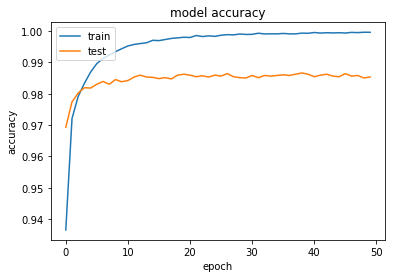

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

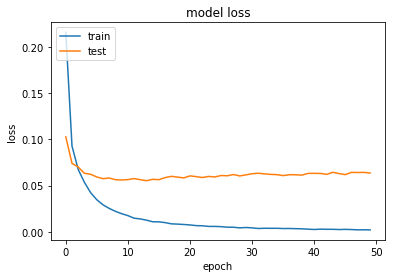

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()